## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from math import sqrt
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
df.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22


In [8]:
summary = df.groupby('Drug Regimen')['Tumor Volume (mm3)']

In [9]:
summary_mean = summary.mean()
summary_median = summary.median()
summary_sem = summary.sem()
summary_var = summary.var()
summary_std = summary.std()


In [10]:
summary = pd.DataFrame({"Mean":summary_mean, "Median":summary_median, "Sem":summary_sem,
                       "Var":summary_var, "Std Dev":summary_std})
summary

,Mean,Median,Sem,Var,Std Dev
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.322552,50.854632,0.512884,42.351070,6.507770
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


In [11]:
#summary['sqrt_N'] = summary['count'].apply(np.sqr)
#summary['SEM'] = summary['std'] / summary['sqrt_N']
#summary.head()
#.mean


## Bar plots

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Text(0, 0.5, 'Data Points')

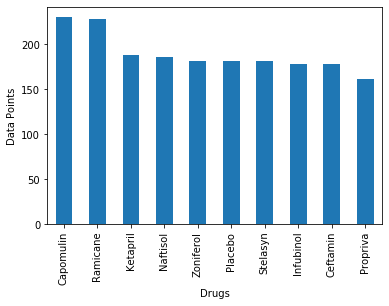

In [13]:
#plt.bar(summary.index, summary['count'])
plt.xticks(rotation=90)
data_points = df["Drug Regimen"].value_counts()
data_points.plot(kind="bar")
plt.xlabel("Drugs")
plt.ylabel("Data Points")


In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

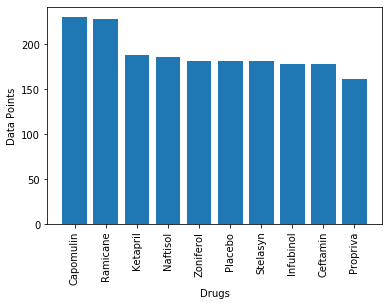

In [15]:
plt.bar(data_points.index.values,data_points.values)
plt.xlabel("Drugs")
plt.ylabel("Data Points")
plt.xticks(rotation=90)

## Pie plots

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

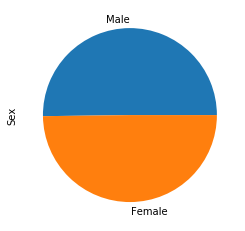

In [17]:
pandas_data = mouse_metadata["Sex"].value_counts()
pandas_data.plot(kind="pie")

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Text(0, 0.5, 'Sex')

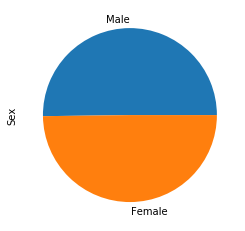

In [19]:
plt.pie(pandas_data.values,labels=pandas_data.index.values)
plt.ylabel("Sex")

## Quartiles, outliers and boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [21]:
tumor_max = df.groupby(["Mouse ID"]).max()
tumor_max = tumor_max.reset_index()
tumor_max

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
capomulin = tumor_max.loc[tumor_max["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
capomulin
# do this three more times for the next drugs

19     45.651331
24     45.000000
61     45.000000
64     46.304003
66     46.809225
81     47.685963
84     45.595685
86     48.158209
88     46.408361
109    48.070452
116    46.154737
122    45.000000
125    46.414518
163    46.539206
164    45.781746
170    47.373423
175    45.000000
181    45.000000
184    46.749006
193    47.212200
205    45.704434
209    45.000000
221    45.893720
227    45.473753
240    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [24]:
ramicane = tumor_max.loc[tumor_max["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
ramicane

6      45.466677
7      45.000000
10     45.000000
12     46.910892
33     45.722279
37     46.940945
45     45.000000
52     46.409084
70     45.851531
77     45.000000
78     45.000000
92     45.252534
94     46.343832
97     45.000000
120    45.000000
127    45.521875
158    45.766111
159    46.585433
167    45.625802
169    45.568211
178    45.000000
191    47.622816
218    45.000000
236    46.378092
245    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [25]:
ketapril = tumor_max.loc[tumor_max["Drug Regimen"]=="Ketapril"]["Tumor Volume (mm3)"]
ketapril


8      49.783419
35     58.046569
39     62.175705
40     65.415955
46     60.233733
55     48.194578
60     45.000000
63     71.905117
67     69.872251
73     74.104086
75     45.000000
96     73.715619
106    50.659581
121    69.253503
123    73.901399
133    66.229606
137    78.567014
146    64.487812
148    75.294936
153    51.236606
192    66.268801
196    56.720095
200    63.189432
214    67.989530
235    62.909441
Name: Tumor Volume (mm3), dtype: float64

In [26]:
naftisol = tumor_max.loc[tumor_max["Drug Regimen"]=="Naftisol"]["Tumor Volume (mm3)"]
naftisol

16     74.997764
23     73.051363
47     63.105696
49     55.138953
51     68.359777
62     52.079510
91     69.563621
112    63.946640
113    76.668817
117    54.082437
126    63.586395
140    50.015079
165    62.670759
166    69.778544
187    75.113288
195    45.000000
197    65.466074
204    51.296543
225    63.283288
226    45.000000
233    53.726101
238    48.475003
242    46.129357
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

{'whiskers': [<matplotlib.lines.Line2D at 0x1a241c8ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a241ce5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2417fe10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a241c8b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a241d5550>],
 'means': []}

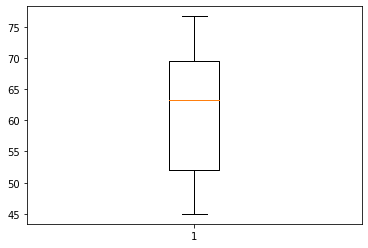

In [27]:
plt.boxplot(naftisol)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a242b2490>,
 'caps': [<matplotlib.lines.Line2D at 0x1a242b2f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a242aa810>],
 'medians': [<matplotlib.lines.Line2D at 0x1a242b89d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a242b8ed0>],
 'means': []}

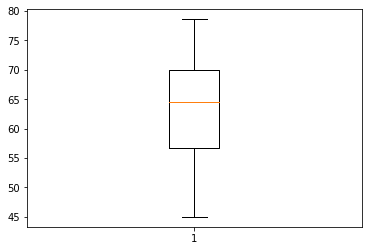

In [28]:
plt.boxplot(ketapril)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2433e350>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2433ee10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a243356d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2427f890>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2427fd90>],
 'means': []}

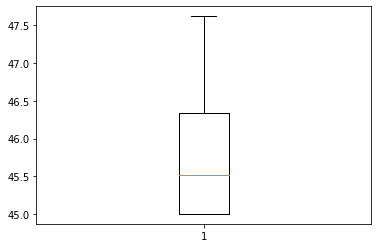

In [29]:
plt.boxplot(ramicane)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2440b610>,
 'caps': [<matplotlib.lines.Line2D at 0x1a24403990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a24403950>],
 'medians': [<matplotlib.lines.Line2D at 0x1a24413b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2440bc50>],
 'means': []}

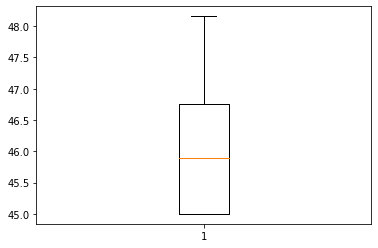

In [30]:
plt.boxplot(capomulin)

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [11]:
cond1 = df.loc[df["Drug Regimen"]=="Capomulin"]
#df9 = df[cond1]
#df9.groupby('Mouse ID')['Mouse ID'].count()
#cond1
mouse_df = cond1.loc[cond1['Mouse ID']=='b128']
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


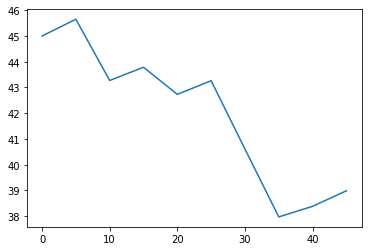

In [12]:
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"])

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cond1 = df.loc[df["Drug Regimen"]=="Capomulin"]
mouse_average_df = cond1.groupby(['Mouse ID']).mean()
mouse_average_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


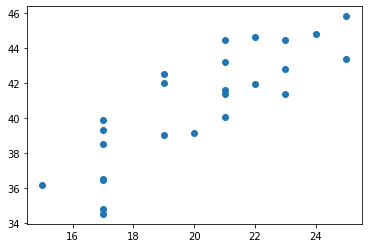

In [15]:
plt.scatter(mouse_average_df['Weight (g)'], mouse_average_df['Tumor Volume (mm3)'])

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [18]:
correlation = st.pearsonr(mouse_average_df['Weight (g)'], mouse_average_df['Tumor Volume (mm3)'])
correlation

(0.8419363424694717, 1.322572243471279e-07)

In [19]:
regression = st.linregress(mouse_average_df['Weight (g)'], mouse_average_df['Tumor Volume (mm3)'])
regression

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

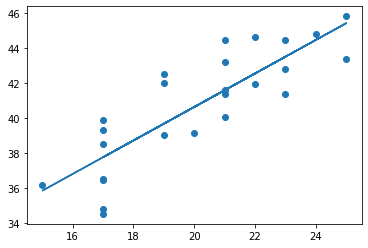

In [22]:
plt.scatter(mouse_average_df['Weight (g)'], mouse_average_df['Tumor Volume (mm3)'])
line_regression = mouse_average_df['Weight (g)']*regression[0]+regression[1]
plt.plot(mouse_average_df['Weight (g)'],line_regression)